
# Parallel Betweenness

Example of parallel implementation of betweenness centrality using the
multiprocessing module from Python Standard Library.

The function betweenness centrality accepts a bunch of nodes and computes
the contribution of those nodes to the betweenness centrality of the whole
network. Here we divide the network in chunks of nodes and we compute their
contribution to the betweenness centrality of the whole network.

Note: The example output below shows that the non-parallel implementation is
faster. This is a limitation of our CI/CD pipeline running on a single core.

Depending on your setup, you will likely observe a speedup.


In [24]:
import sys
sys.path.insert(1, '/home/mauricio/code/mcr')
from mcr.nx import betweenness_centrality_parallel
import networkx as nx

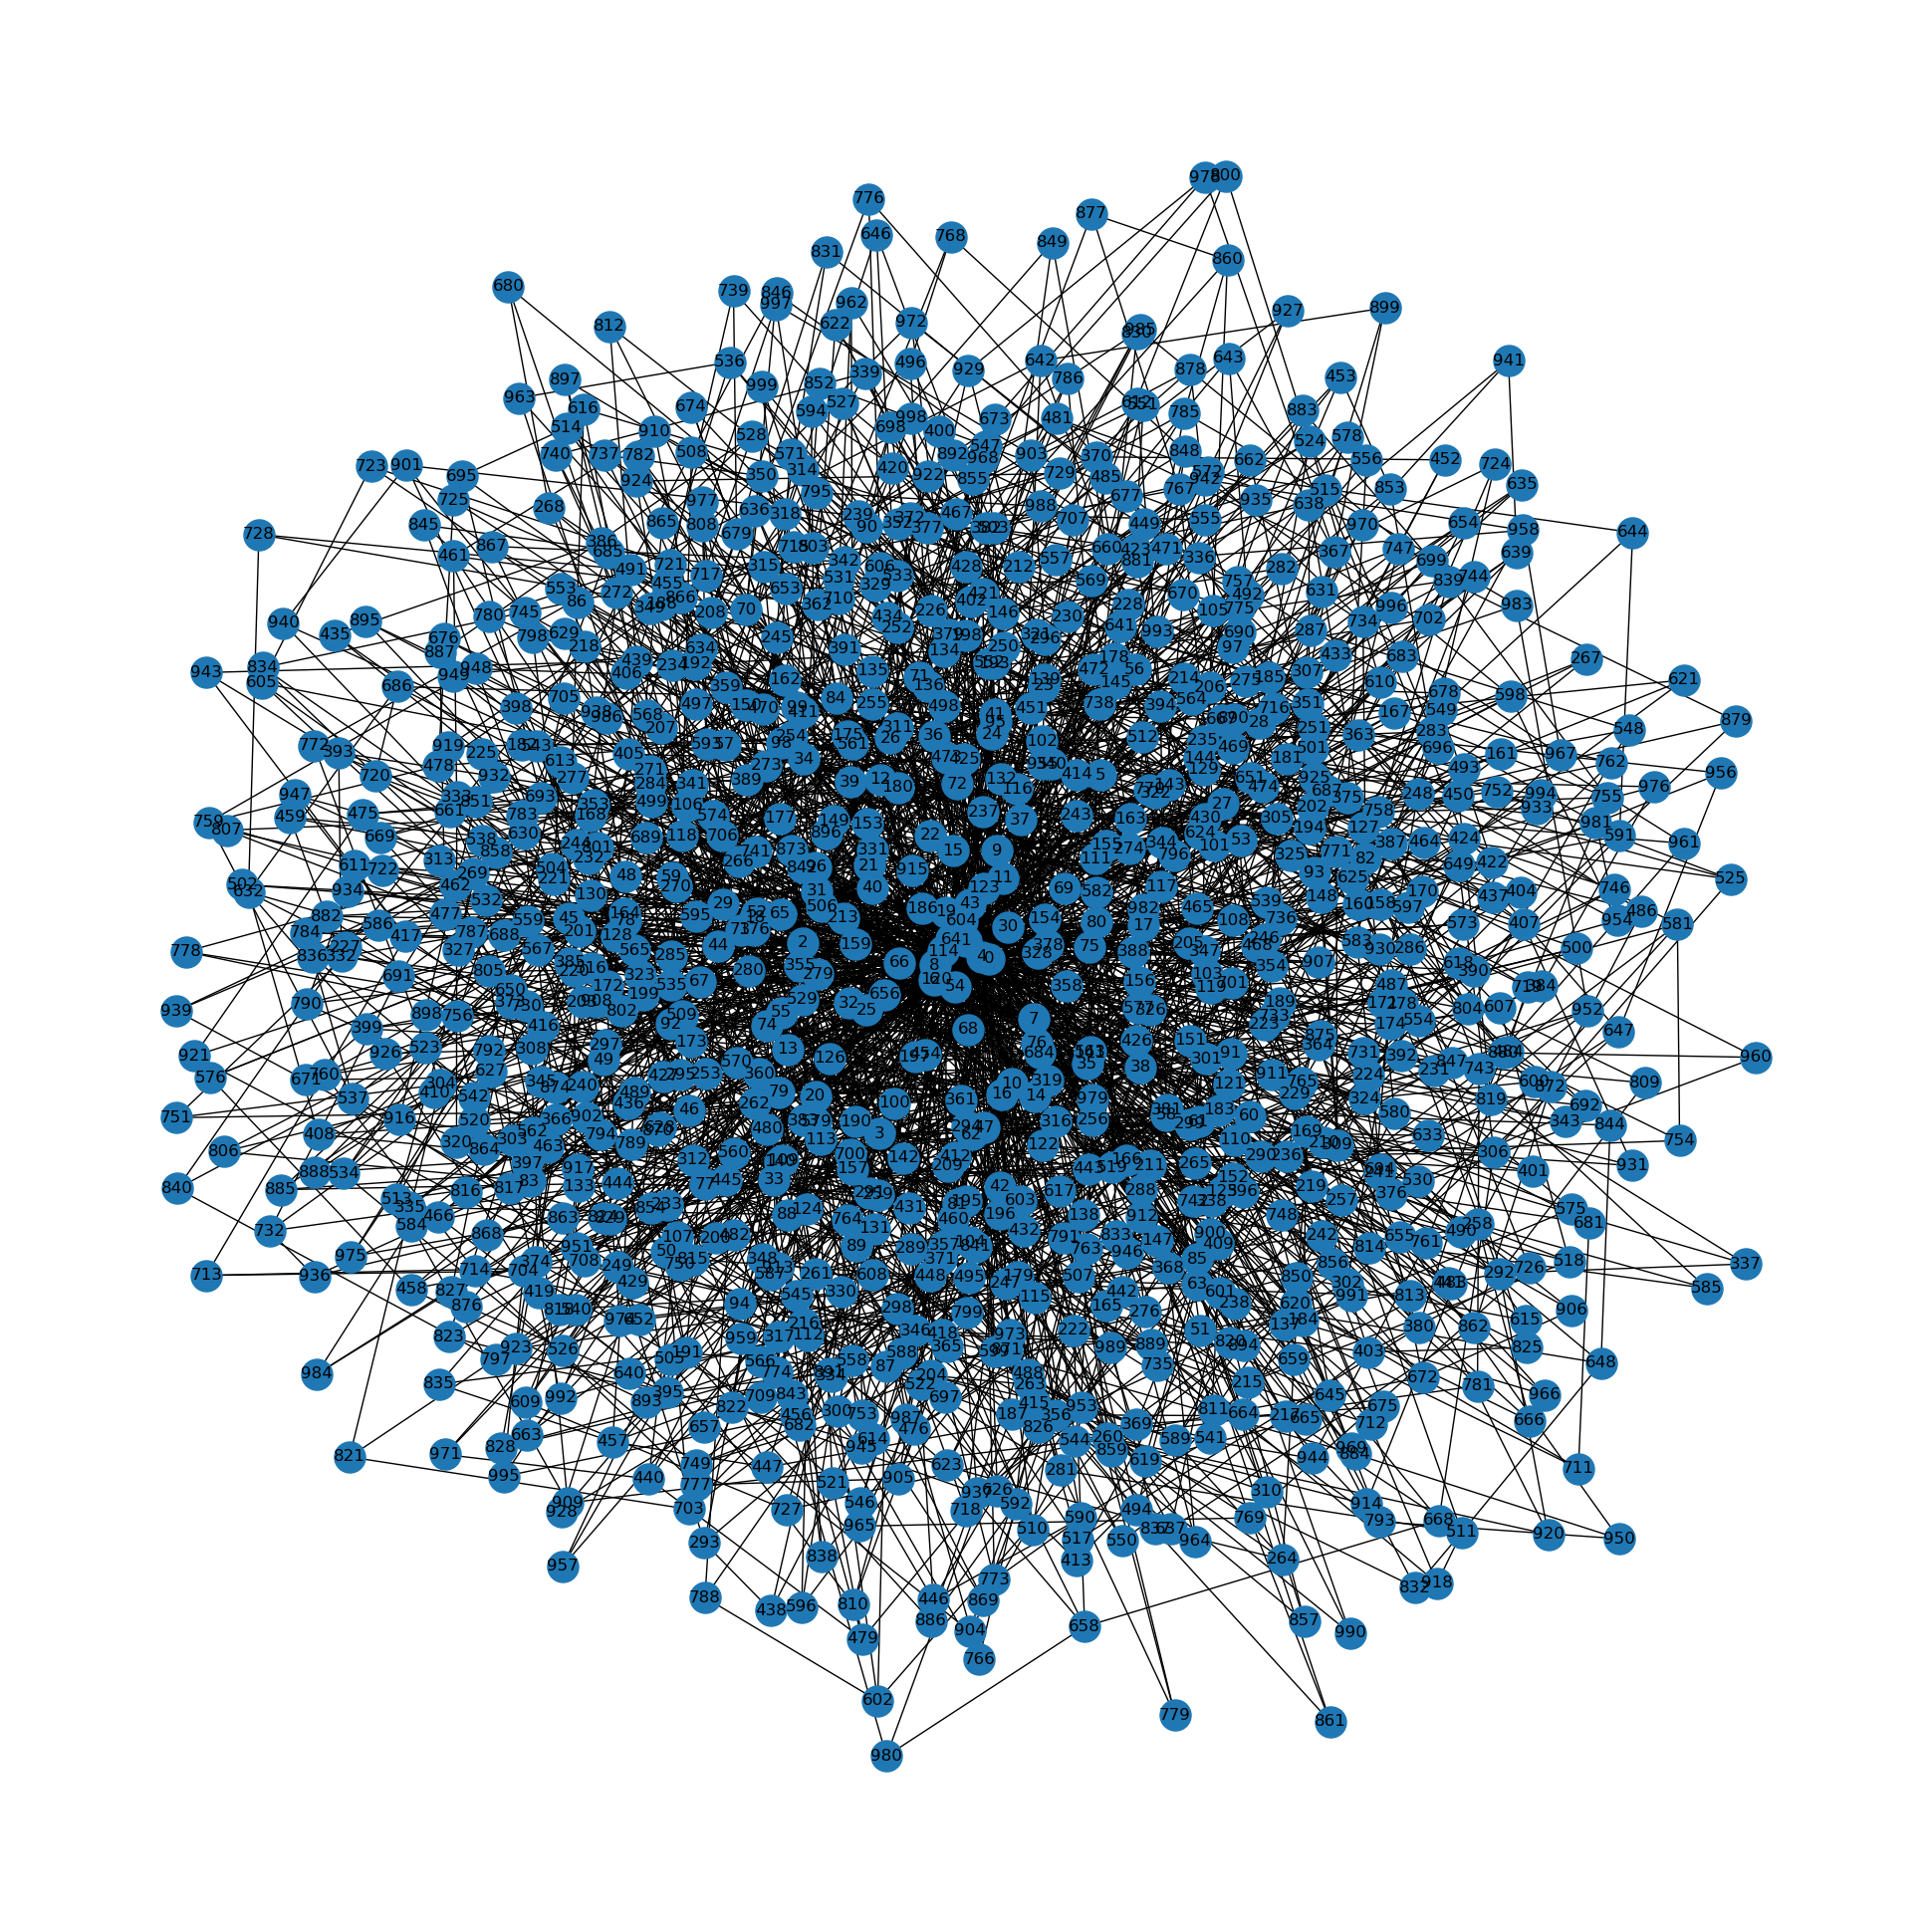

In [24]:
G_ba = nx.barabasi_albert_graph(1000, 3)
plt.figure(figsize=(19.2, 19.2))
nx.draw(G_ba, node_size=500, with_labels=True)
plt.show()

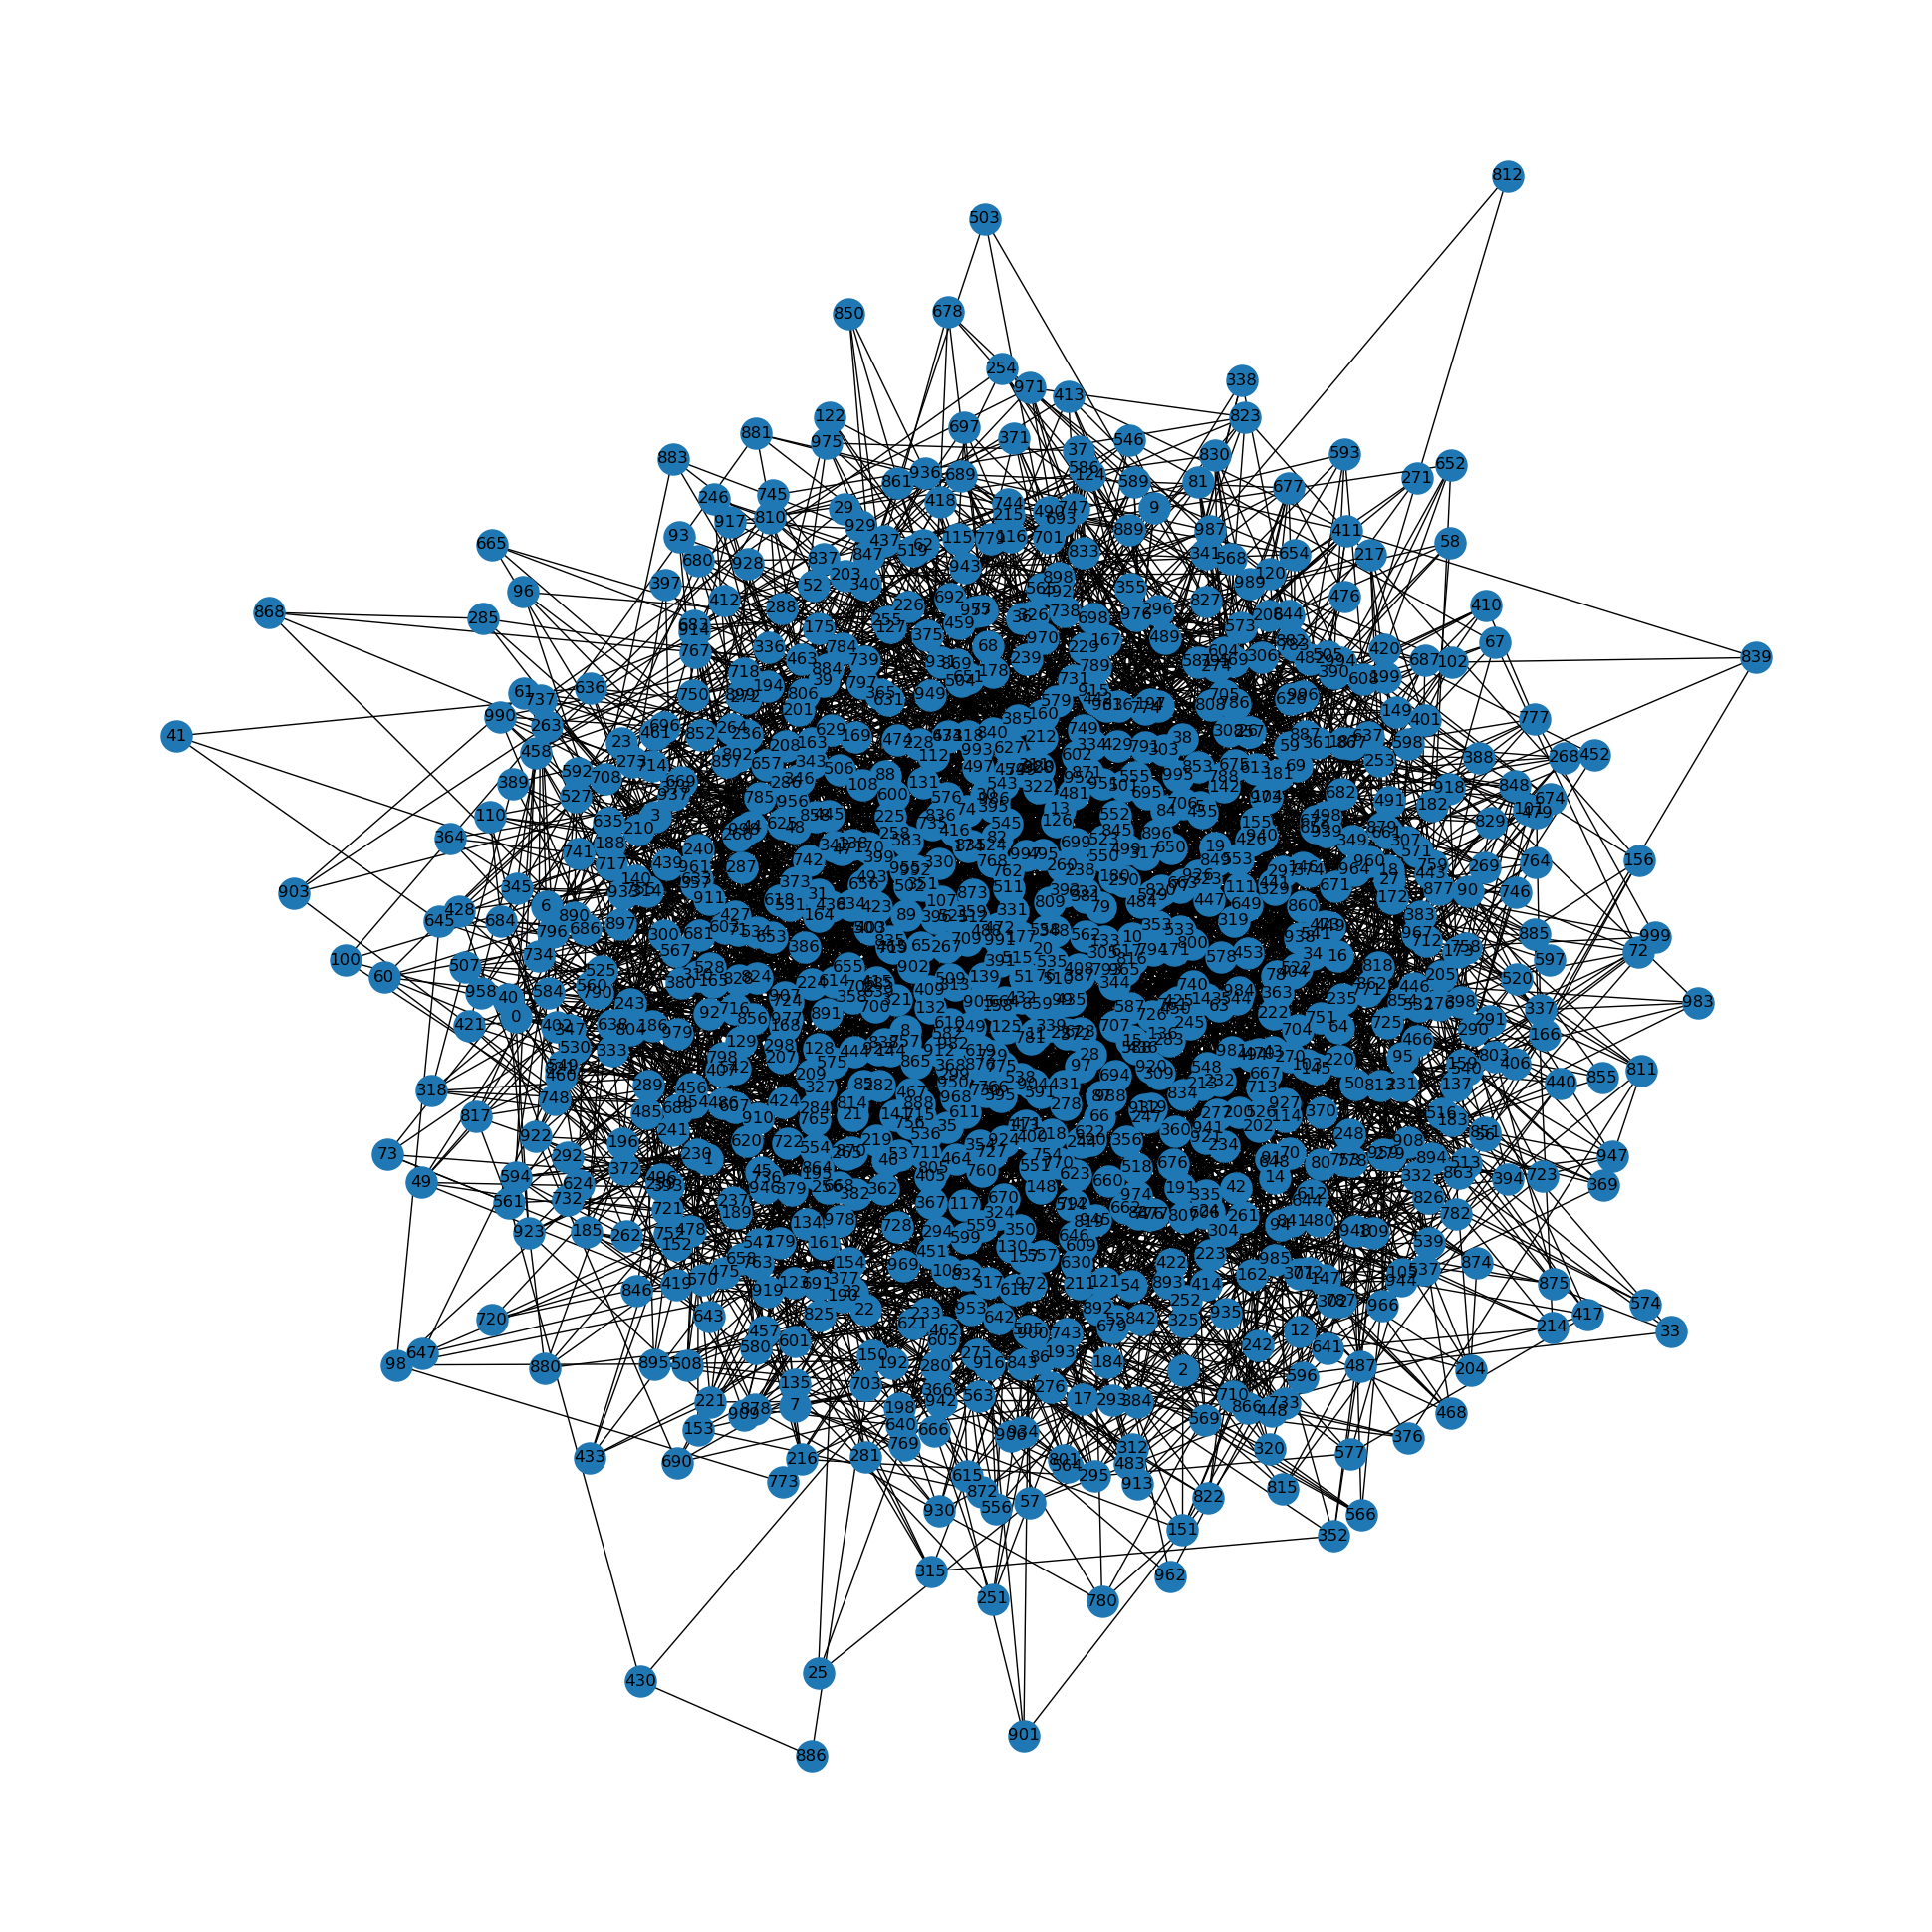

In [25]:
G_er = nx.gnp_random_graph(1000, 0.01)
plt.figure(figsize=(19.2, 19.2))
nx.draw(G_er, node_size=500, with_labels=True)
plt.show()

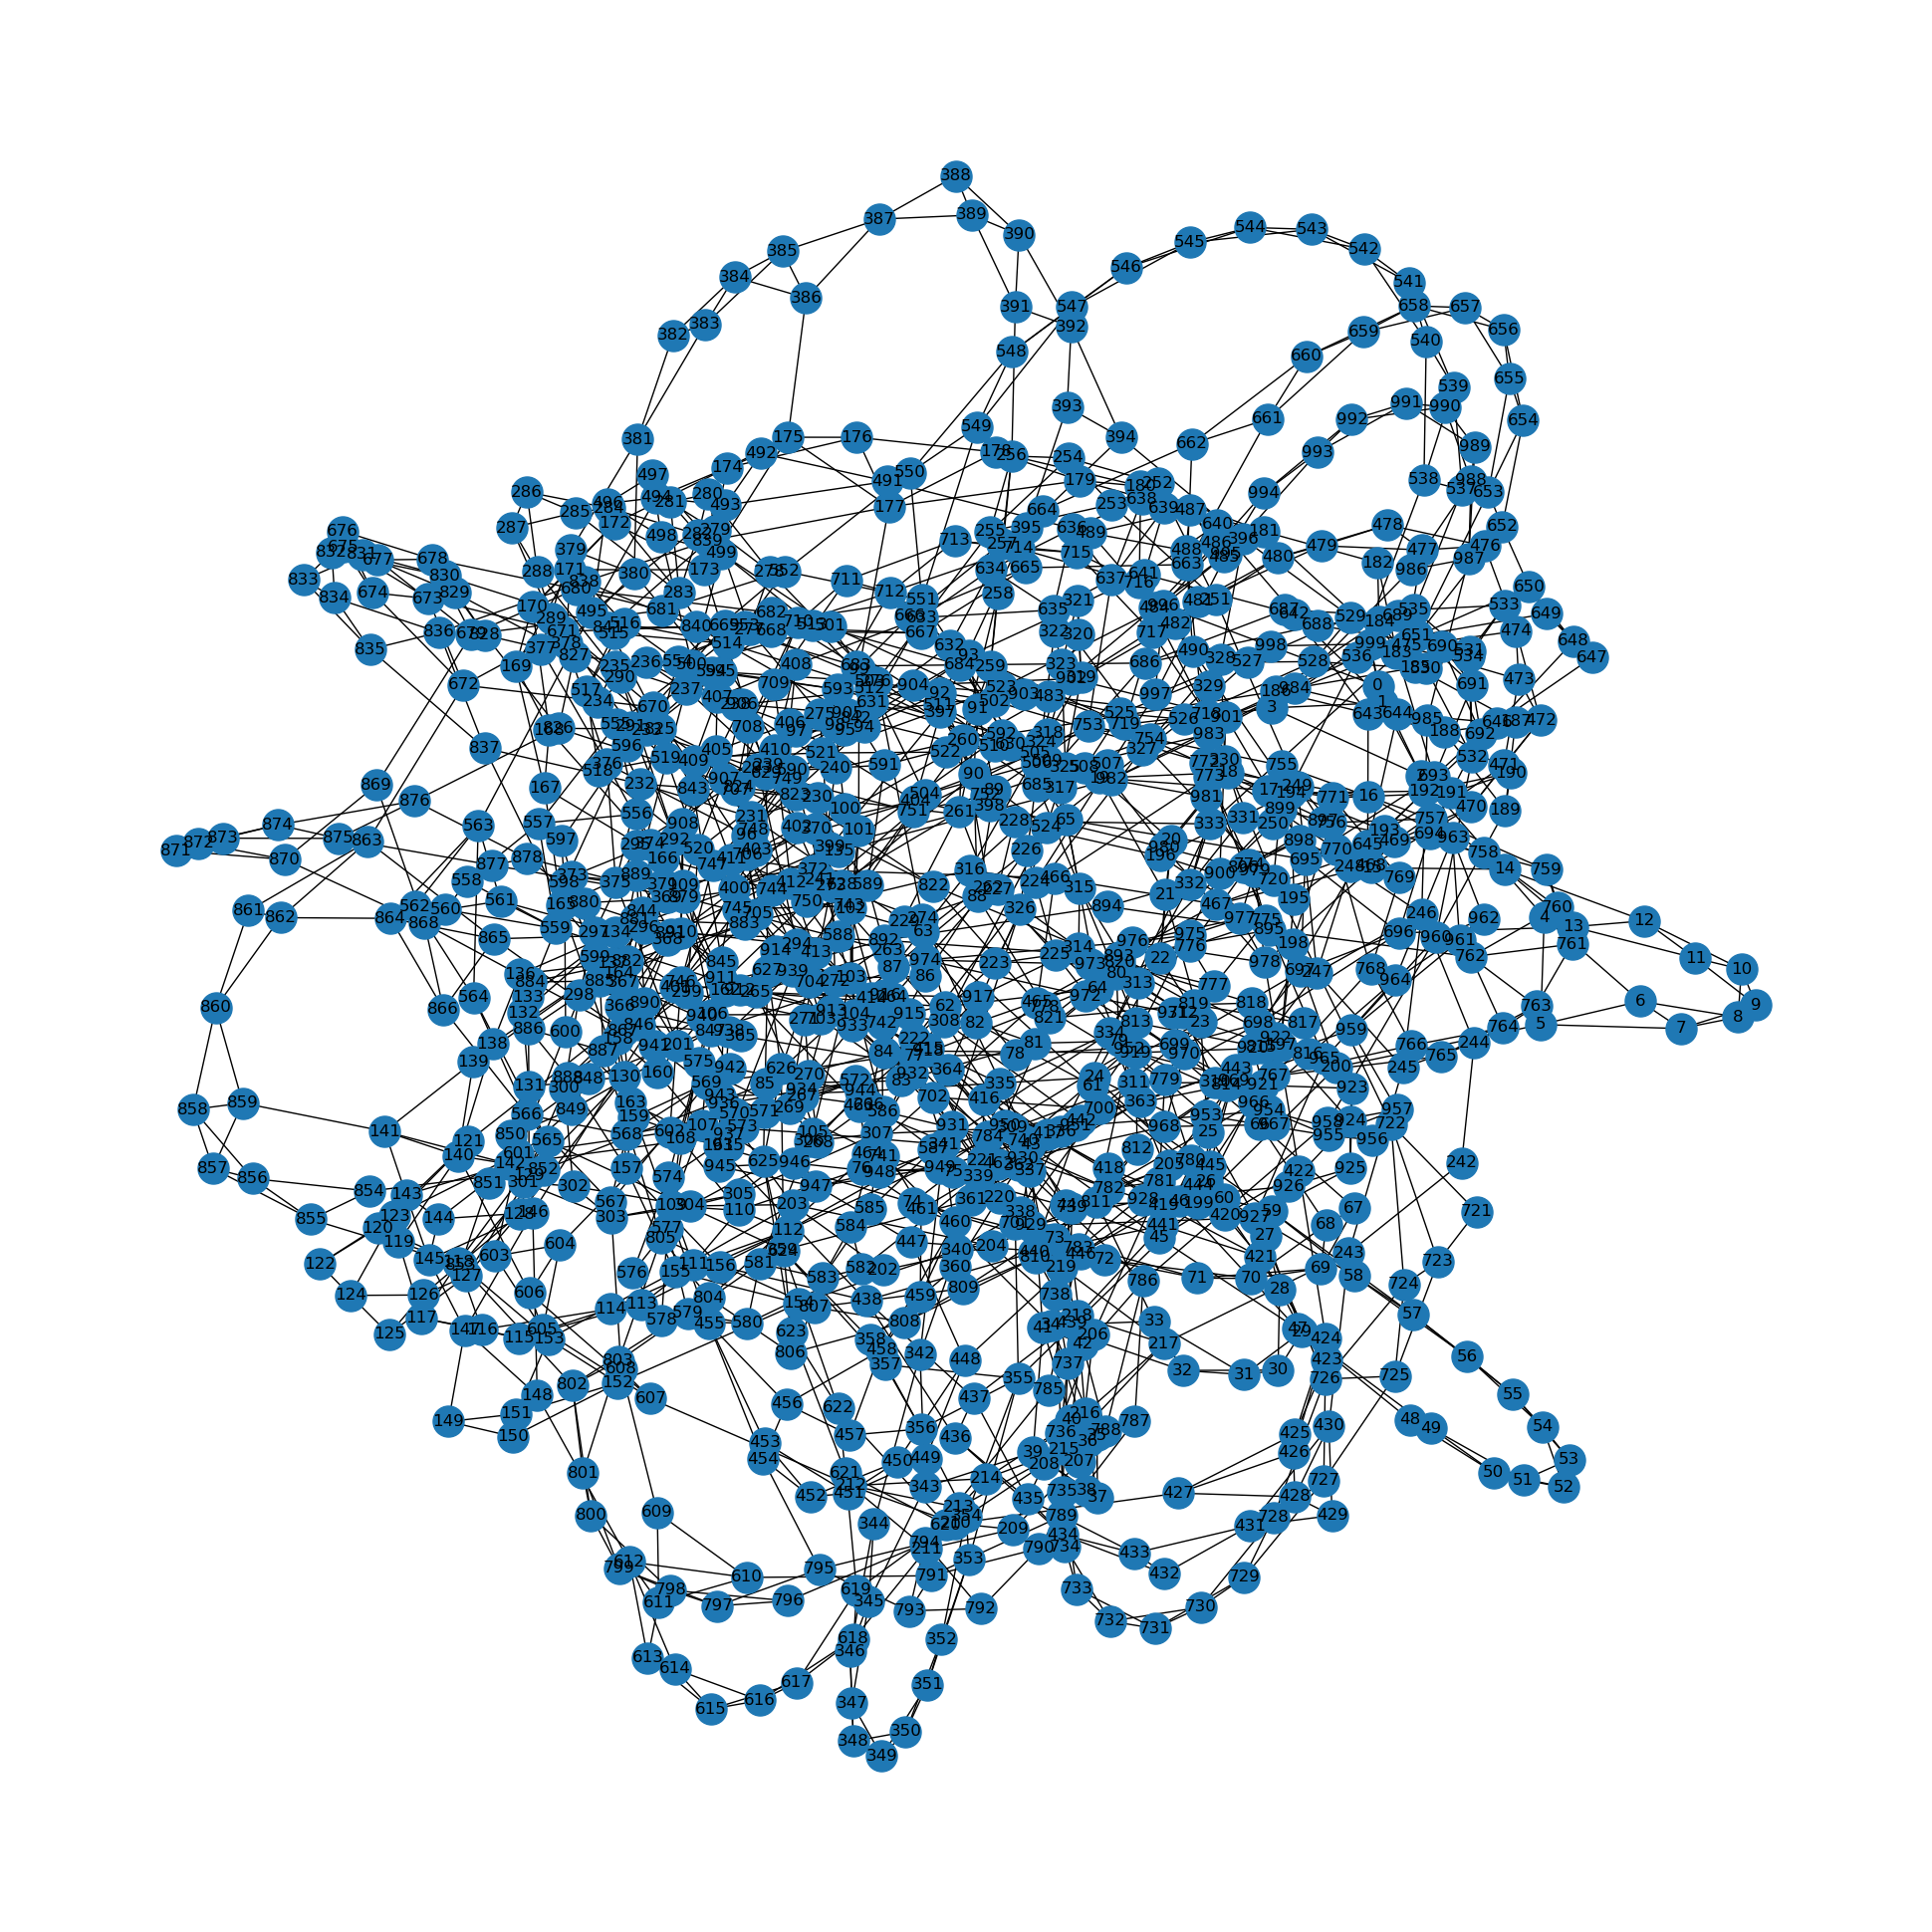

In [27]:
G_ws = nx.connected_watts_strogatz_graph(1000, 4, 0.1)
plt.figure(figsize=(19.2, 19.2))
nx.draw(G_ws, node_size=500, with_labels=True)
plt.show()

In [28]:
for G in [G_ba, G_er, G_ws]:
    print("")
    print("Computing betweenness centrality for:")
    print(G)
    print("\tParallel version")
    start = time.time()
    bt = betweenness_centrality_parallel(G)
    print(f"\t\tTime: {(time.time() - start):.4F} seconds")
    print(f"\t\tBetweenness centrality for node 0: {bt[0]:.5f}")
    print("\tNon-Parallel version")
    start = time.time()
    bt = nx.betweenness_centrality(G)
    print(f"\t\tTime: {(time.time() - start):.4F} seconds")
    print(f"\t\tBetweenness centrality for node 0: {bt[0]:.5f}")
print("")


Computing betweenness centrality for:
Graph with 1000 nodes and 2991 edges
	Parallel version
		Time: 0.6134 seconds
		Betweenness centrality for node 0: 0.12887
	Non-Parallel version
		Time: 1.3885 seconds
		Betweenness centrality for node 0: 0.12887

Computing betweenness centrality for:
Graph with 1000 nodes and 4947 edges
	Parallel version
		Time: 0.3795 seconds
		Betweenness centrality for node 0: 0.00230
	Non-Parallel version
		Time: 1.7737 seconds
		Betweenness centrality for node 0: 0.00230

Computing betweenness centrality for:
Graph with 1000 nodes and 2000 edges
	Parallel version
		Time: 0.2635 seconds
		Betweenness centrality for node 0: 0.00402
	Non-Parallel version
		Time: 1.1855 seconds
		Betweenness centrality for node 0: 0.00402

